# 02 - Getting Data

In [1]:
# loading libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
#import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### Read .csv file

In [2]:
file = pd.read_csv('csv_files/marketing_customer_analysis.csv')

In [3]:
file.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 03 - Cleaning / Wrangling / EDA

### Standardize header names.

In [4]:
# assigning variable to headers
column_names = file.columns

In [5]:
# transforming to lower case insert, replace(' ’, ‘_’)
cols = []
for i in range(len(column_names)):
    cols.append(column_names[i].lower().replace(" ","_"))
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [6]:
dataset = file
dataset.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
dataset.columns = cols

In [8]:
dataset.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### split categorical and numerical

In [9]:
# Columns that are numerical
numericaldata = dataset.select_dtypes('float64')
numericaldata.head()

,customer_lifetime_value,total_claim_amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879


In [10]:
# Columns that are categorical
categoricaldata = dataset.select_dtypes('object')
categoricaldata.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Check and deal with NaN values.

In [11]:
nulls_df = pd.DataFrame(round(dataset.isna().sum()/len(dataset),4)*100)
nulls_df
# no null values detected

,0
customer,0.0
state,0.0
customer_lifetime_value,0.0
response,0.0
coverage,0.0
education,0.0
effective_to_date,0.0
employmentstatus,0.0
gender,0.0
income,0.0


### Datetime format- Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie Jan Feb and March

In [12]:
dataset['effective_to_date'] = pd.DatetimeIndex(dataset['effective_to_date']).month

In [13]:
dataset.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [14]:
dataset[(dataset["effective_to_date"]<=3)]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# 03 EDA

### Show DataFrame info.

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   int64  
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

### Describe DataFrame

In [16]:
dataset.describe()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,1.463762,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,0.498712,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,1.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,1.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,1.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,2.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,2.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Show a plot of the total number of responses broken down by response kind.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

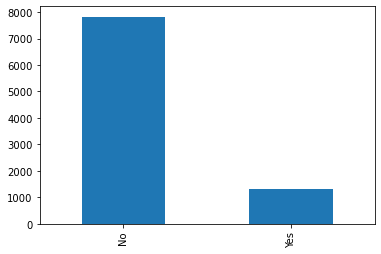

In [18]:
dataset['response'].value_counts().plot(kind='bar')

### Show a plot of the number of responses by the sales channel.

Text(0.5, 1.0, 'responses_by_sales_channel')

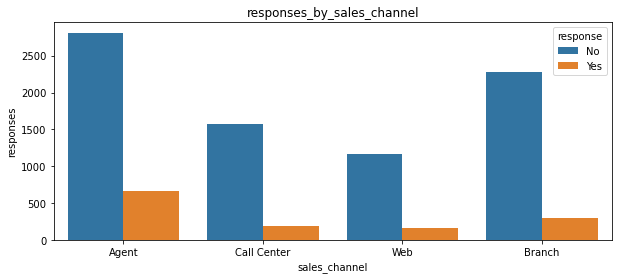

In [19]:
plt.figure(figsize = (10, 4))
sns.countplot(x = 'sales_channel', hue = 'response', data = dataset)
plt.ylabel("responses")
plt.title("responses_by_sales_channel")

### Show a plot of the distribution of the total claim amount, broken down by response kind. Try a boxplot and distribution plot, for each response kind. For the distribution plot, try to plot both kinds of responses in one chart (you can try with seaborn's histplot, using the hue parameter).

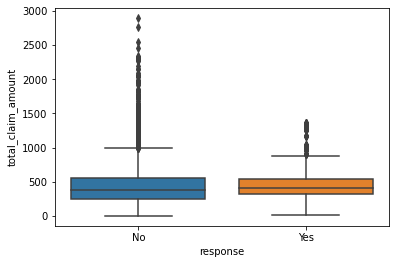

In [20]:
# dataset[['Total Claim Amount']].boxplot(by = 'Responses')
sns.boxplot(x="response", y="total_claim_amount", data=dataset)
plt.show()

Text(0.5, 1.0, 'total_claim_amount')

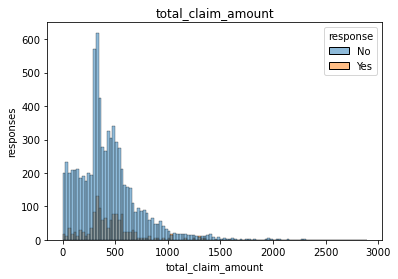

In [21]:
sns.histplot(x = 'total_claim_amount', hue = 'response' , data = dataset)
plt.ylabel("responses")
plt.title("total_claim_amount")

### Show a plot of the response rate by income. Create similar plots like in the task before, but for Income

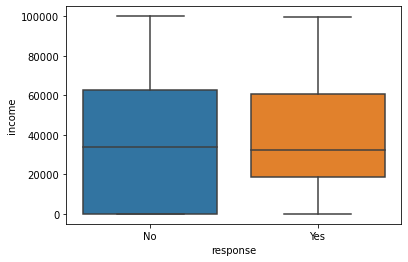

In [22]:
### Create similar plots like in the task before, but for Income
sns.boxplot(x="response", y="income", data=dataset)
plt.show()

Text(0, 0.5, 'responses')

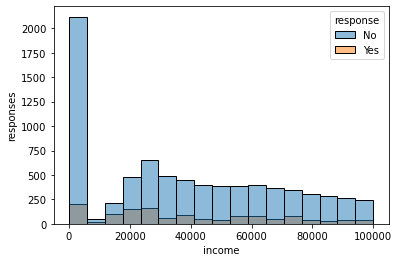

In [23]:
sns.histplot(x = 'income', hue = 'response', data = dataset)
plt.ylabel("responses")

### NEW: Create a scatterplot between total claim amount and income. Play around with the parameters of the scatterplot (markersize? alpha?) and try to identify more features within the data just visually. You can also try different seaborn plots. Check to find suitable ones: https://www.python-graph-gallery.com/134-how-to-avoid-overplotting-with-python

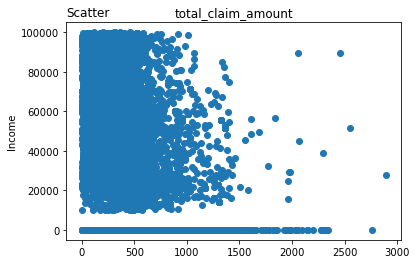

In [24]:
plt.scatter(x=dataset['total_claim_amount'], y=dataset['income'])
plt.title('Scatter', loc='left')
plt.ylabel("Income")
plt.title("total_claim_amount")
plt.show()

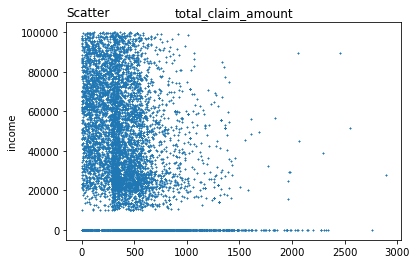

In [25]:
plt.scatter(x=dataset['total_claim_amount'], y=dataset['income'], marker='x', s=1)
plt.title('Scatter', loc='left')
plt.ylabel("income")
plt.title("total_claim_amount")
plt.show()

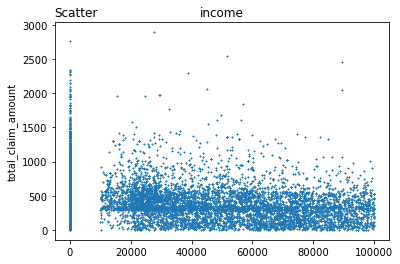

In [26]:
plt.scatter(x=dataset['income'], y=dataset['total_claim_amount'], marker='x', s=1)
plt.title('Scatter', loc='left')
plt.ylabel("total_claim_amount")
plt.title("income")
plt.show()

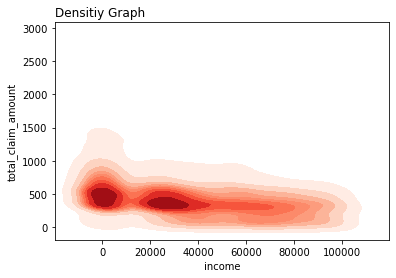

In [27]:
sns.kdeplot(data = dataset, x=dataset['income'], y=dataset['total_claim_amount'], cmap="Reds", shade=True)
plt.title('Densitiy Graph', loc='left')
plt.show()

# Lab Round 4: Distribution and Regression

### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [28]:
# check data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   int64  
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [29]:
#get the numerical
numericaldf = dataset.select_dtypes(['float64','int64'])
numericaldf.reset_index(drop=True, inplace=True)

In [30]:
numericaldf.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,2,56274,69,32,5,0,1,384.811147
1,6979.535903,1,0,94,13,42,0,8,1131.464935
2,12887.431650,2,48767,108,18,38,0,2,566.472247
3,7645.861827,1,0,106,18,65,0,7,529.881344
4,2813.692575,2,43836,73,12,44,0,1,138.130879


In [31]:
#defined earlier but extracted in new dataset
categoricaldf = dataset.select_dtypes('object')

In [32]:
categoricaldf.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Now we will try to check the normality of the numerical variables visually

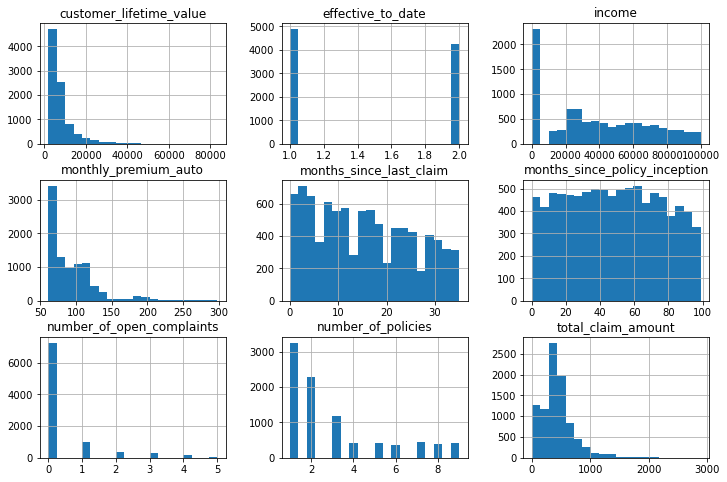

In [33]:
numericaldf.hist(bins=20, figsize=(12, 8), layout=(3, 3));

### Use seaborn library to construct distribution plots for the numerical variables

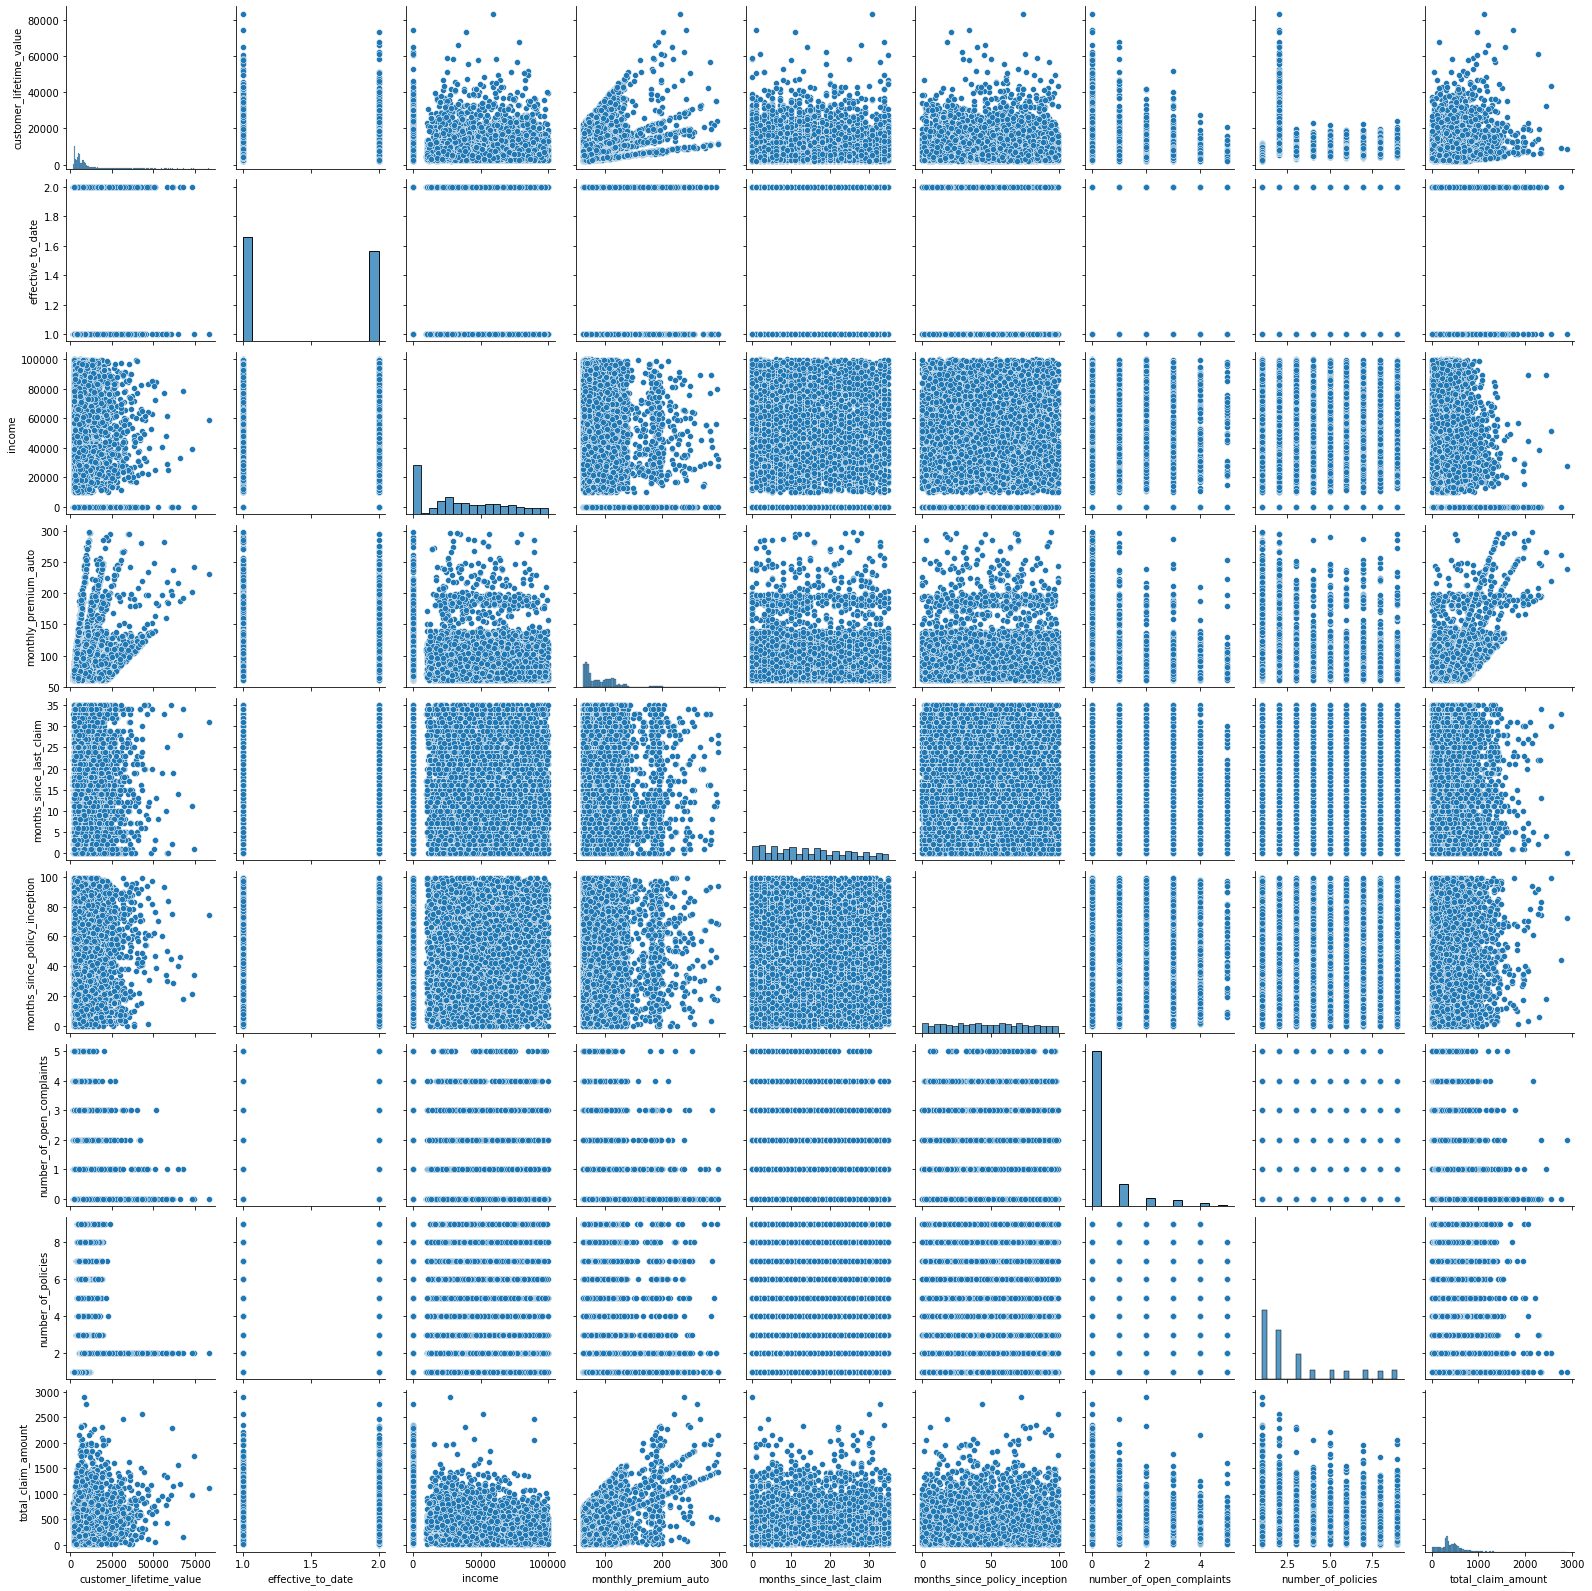

In [34]:
sns.pairplot(numericaldf)

### Use Matplotlib to construct histograms

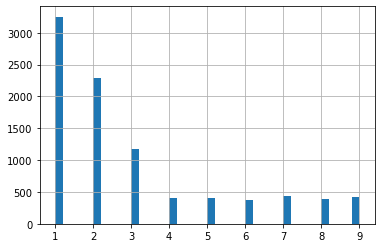

In [35]:
numericaldf['number_of_policies'].hist(bins=40)
plt.show()

### Do the distributions for different numerical variables look like a normal distribution

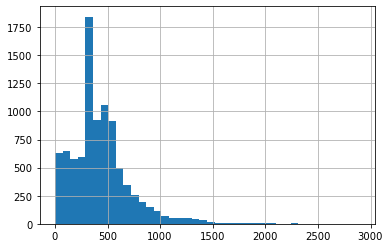

In [36]:
numericaldf['total_claim_amount'].hist(bins=40)
plt.show()

### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [39]:
# print of all correlation values
corrmatrix = numericaldf.corr()

### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

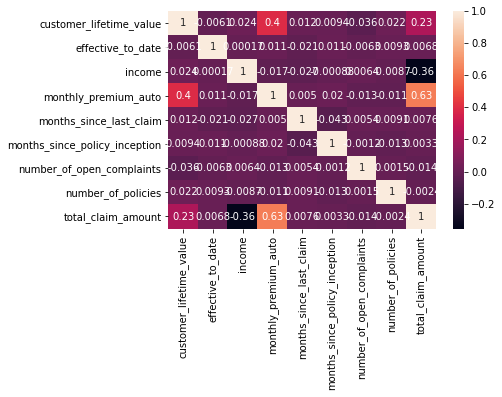

In [40]:
# no values greater than 0.9, biggest correlation is 0,63 between "Total Claim Amount" and "Monthly Premium Auto"
# "Total Claim Amount" is the dependent variable
sns.heatmap(corrmatrix, annot=True)
plt.show()

# 04 Pre-Processing Data

In [123]:
#setting display options
pd.set_option('display.max_columns', None)

In [124]:
#divide the data into x and y
y = dataset['total_claim_amount']
x = dataset.drop(['total_claim_amount'], axis=1)

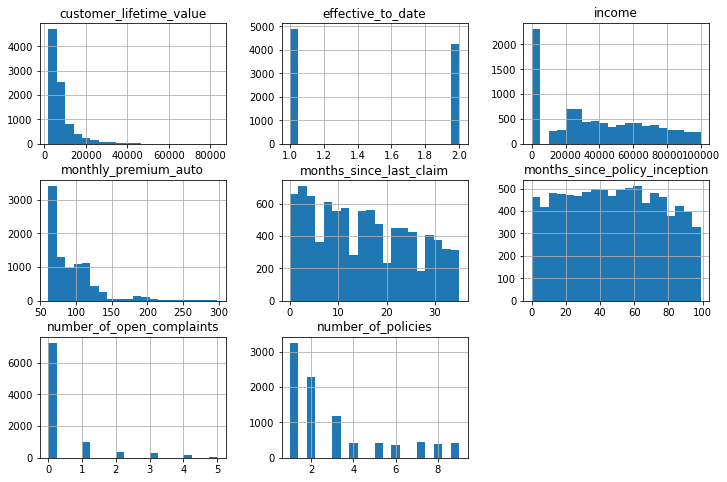

In [125]:
#plot the numerical values again
x.hist(bins=20, figsize=(12, 8), layout=(3, 3));

In [126]:
# split again in numerical and categorical - only to ensure consistency
x_num = dataset.select_dtypes(include = np.number)
x_cat = dataset.select_dtypes(include = np.object)
print(x_num.shape)
print(x_cat.shape)

(9134, 9)
(9134, 15)


In [127]:
x_cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [128]:
#define two models:
# 1 - with marital_status as only categorical value for linear regression model
# 2 - with marital_status as only categorical value for linear regression model

#1
x_cat_1 = dataset["marital_status"]
x_cat_1 = x_cat_1.to_frame()

#2
x_cat_2 = dataset["gender"]
x_cat_2 = x_cat_2.to_frame()

In [129]:
# extra dataset for date to run minmax seperatly 
x_date = dataset["effective_to_date"].copy()
x_num = x_num.drop(['effective_to_date'], axis=1)
x_date = x_date.to_frame()
print(x_date.shape)
print(x_num.shape)

(9134, 1)
(9134, 8)


In [130]:
#minMax onto date
from sklearn.preprocessing import minmax_scale
x_date = minmax_scale(x_date)
print(x_date.shape)

(9134, 1)


In [131]:
# normalize x_num
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(x_num)
x_normalized = transformer.transform(x_num)
print(x_normalized.shape)

(9134, 8)


In [132]:
#OHE for x_cat_1 and x_cat_2
from sklearn.preprocessing import OneHotEncoder
encoded_1 = OneHotEncoder(handle_unknown='error', drop='first').fit(x_cat_1)
encoded_1 = encoded_1.transform(x_cat_1).toarray()
encoded_2 = OneHotEncoder(handle_unknown='error', drop='first').fit(x_cat_2)
encoded_2 = encoded_2.transform(x_cat_2).toarray()

print(encoded_1)
print(encoded_1.shape)

print(encoded_2)
print(encoded_2.shape)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
(9134, 2)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
(9134, 1)


In [133]:
# Model 1 with x_cat_1 only "marital_status"

# bring the x-Data together
x_1 = np.concatenate((x_normalized, x_date, encoded_1), axis = 1)

In [134]:
# Set test data
from sklearn.model_selection import train_test_split
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1, y, test_size=0.2, random_state=100)

In [141]:
# run linear regression and calculate r2
lm_1 = linear_model.LinearRegression()
model_1 = lm_1.fit(x_1_train,y_1_train)
predictions_1  = lm_1.predict(x_1_test)
r2_score(y_1_test, predictions_1)

0.4789407741838988

In [142]:
# Model 2 with x_cat_1 only "gender"

# bring the x-Data together
x_2 = np.concatenate((x_normalized, x_date, encoded_2), axis = 1)

In [143]:
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y, test_size=0.2, random_state=100)

In [144]:
# Model 2 with x_cat_2 only "gender"
lm_2 = linear_model.LinearRegression()
model_2 = lm_2.fit(x_2_train,y_2_train)
predictions_2  = lm_2.predict(x_2_test)
r2_score(y_2_test, predictions_2)

0.4815844372001489

In [145]:
# calculate model_1 for complete dataset, correct?
predictions_1 = lm_1.predict(x_1)

#calculat model_2 for complete dataset
predictions_2 = lm_2.predict(x_2)

In [147]:
# compare results visually
column_names = ["total_claim_amount", "model_1", "model_2"]
resultsdf = pd.DataFrame(columns = column_names)
resultsdf["total_claim_amount"] = file["total_claim_amount"]
resultsdf["model_1"] = predictions_1.tolist()
resultsdf["model_2"] = predictions_2.tolist()

In [149]:
resultsdf.head(20)

,total_claim_amount,model_1,model_2
0,384.811147,305.486580,298.541734
1,1131.464935,974.176897,959.097377
2,566.472247,442.558175,435.746256
3,529.881344,431.719963,452.920504
4,138.130879,303.413586,301.847063
5,159.383042,329.438495,322.088343
6,321.600000,332.163337,325.236766
7,363.029680,439.261904,441.610675
8,511.200000,710.757044,722.588787
9,425.527834,414.314861,407.394350


## Results

Both models have more or less the same accuracy of predicting the total claim amount.
Next iterations for model fit shall be focused on working with other / more catgorical values.